In [49]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import plotly as plt

In [50]:
import warnings
warnings.filterwarnings('ignore')

На этом шаге поработаем с категориальными признаками. Причем попробуем два варианта обработки поля 'sub_area', т.к. он довольно важный. Так как у нас не так много данных и не такая тяжелая модель, можем позволить себе разные варианты посмотреть

In [51]:
data_v1 = pd.read_csv("data_step2.csv")

In [52]:
data_v1.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,usdrub,salary,mortgage_rate,unemployment,log_price_doc
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,1983.0,1.909804,6.399301,2.107025,...,29,4036616,708.57,1,4,29.0048,44898.7,11.84,0.014,15.581952
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,...,66,2034942,673.81,1,14,28.9525,44898.7,11.84,0.014,15.607270
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,...,43,1572990,702.68,0,10,28.8082,44898.7,11.84,0.014,15.555977
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,2000.0,1.909804,6.399301,2.107025,...,8,942180,931.58,0,3,28.9655,44898.7,11.92,0.014,16.388123
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,1915.0,1.909804,6.399301,2.107025,...,689,3503058,853.88,2,14,29.4625,44898.7,11.92,0.014,16.608603


In [53]:
categorical_columns = data_v1.loc[:,data_v1.dtypes == object].columns

In [54]:
categorical_columns

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [55]:
data_v1[categorical_columns].describe()

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,160,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


Дату пока вынесем за скобки, а в отношении остальных попробуем два разных подхода.

Подход первый: если уникальных значений меньше 5, то сделаем one hot encoding, если значений больше, то применим принцип Target Encoding

Но сначала сделаем кое-что на будущее.

In [56]:
set_sub_area = dict()

In [57]:
sub_area = data_v1.groupby('sub_area')['log_price_doc'].mean()

In [58]:
for sub in data_v1['sub_area'].unique().tolist():
    set_sub_area[sub] = sub_area[sub]

In [59]:
set_sub_area

{'Bibirevo': 15.594247302959994,
 'Nagatinskij Zaton': 15.864842484889207,
 "Tekstil'shhiki": 15.613140912985648,
 'Mitino': 15.914449243424706,
 'Basmannoe': 16.091226781242412,
 'Nizhegorodskoe': 15.485264282387343,
 "Sokol'niki": 16.114676893657208,
 'Koptevo': 15.604641528875847,
 'Kuncevo': 15.765432470500368,
 'Kosino-Uhtomskoe': 15.530455423511325,
 'Zapadnoe Degunino': 15.388979646017786,
 'Presnenskoe': 16.035761985565525,
 'Lefortovo': 15.67054481679128,
 "Mar'ino": 15.69626871914369,
 "Kuz'minki": 15.502661848502148,
 'Nagornoe': 15.953572581621573,
 "Gol'janovo": 15.417157405676486,
 'Vnukovo': 15.342207744111885,
 'Juzhnoe Tushino': 15.61401445013938,
 'Severnoe Tushino': 15.77877784326621,
 "Chertanovo Central'noe": 15.642011426541199,
 'Fili Davydkovo': 15.700234213821487,
 'Otradnoe': 15.627700790656306,
 'Novo-Peredelkino': 15.549344162446525,
 'Bogorodskoe': 15.51767624973682,
 'Jaroslavskoe': 15.524631038656949,
 'Strogino': 15.886118551219413,
 'Hovrino': 15.7797662

In [87]:
sub_area = pd.DataFrame(list(set_sub_area.items()), columns=['sub_area', 'value'])

In [88]:
sub_area

,sub_area,value
0,Bibirevo,15.594247
1,Nagatinskij Zaton,15.864842
2,Tekstil'shhiki,15.613141
3,Mitino,15.914449
4,Basmannoe,16.091227
...,...,...
141,Poselenie Klenovskoe,13.815512
142,Poselenie Rogovskoe,15.664444
143,Poselenie Kievskij,15.899304
144,Molzhaninovskoe,14.505308


In [90]:
sub_area.to_csv('sub_area_values.csv', index=False, index_label=False)

In [60]:
for col in categorical_columns:
    if col != 'timestamp':
        if data_v1[col].nunique() < 5:
            one_hot = pd.get_dummies(data_v1[col], prefix=col, drop_first=True, dtype='float32')
            data_v1 = pd.concat((data_v1.drop(col, axis=1), one_hot), axis=1)
        else:
            mean_target = data_v1.groupby(col)['log_price_doc'].mean()
            data_v1[col] = data_v1[col].map(mean_target)

In [61]:
data_v1.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,1983.0,1.909804,6.399301,2.107025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,2000.0,1.909804,6.399301,2.107025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,1915.0,1.909804,6.399301,2.107025,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Обработаем время.

In [62]:
data_v1['timestamp'] = pd.to_datetime(data_v1['timestamp'])
data_v1['month'] = data_v1.timestamp.dt.month
data_v1['year'] = data_v1.timestamp.dt.year

In [63]:
data_v1 = data_v1.sort_values('timestamp')

Важная оговорка про время.

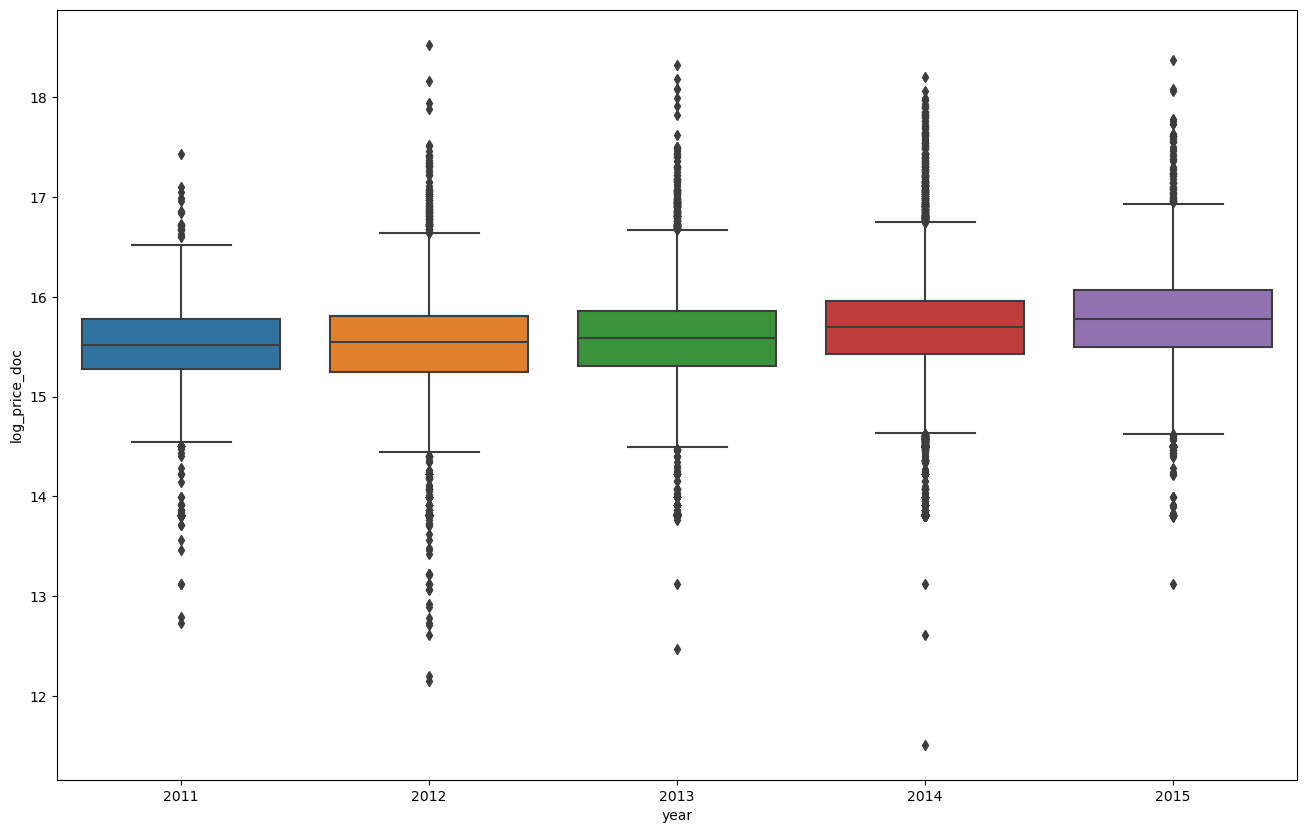

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=data_v1['year'].astype('category'), data=data_v1)
plt.show()

Мы видим, что год реализации квартиры очевидно влияет на её стоимость, что в целом и логично. Запомним это, далее к этому еще вернемся.

In [65]:
one_hot = pd.get_dummies(data_v1['year'], prefix='year', drop_first=True, dtype='float32')
data_v1 = pd.concat((data_v1.drop('year', axis=1), one_hot), axis=1)

In [66]:
one_hot = pd.get_dummies(data_v1['month'], prefix='month', drop_first=True, dtype='float32')
data_v1 = pd.concat((data_v1.drop('month', axis=1), one_hot), axis=1)

In [67]:
data_v1 = data_v1.drop('timestamp', axis=1)

In [68]:
data_v1.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,43,27.0,4.0,12.558974,1.827121,1983.0,1.909804,6.399301,2.107025,15.594247,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,34,19.0,3.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,15.864842,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,43,29.0,2.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,15.613141,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,89,50.0,9.0,12.558974,1.827121,2000.0,1.909804,6.399301,2.107025,15.914449,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,77,77.0,4.0,12.558974,1.827121,1915.0,1.909804,6.399301,2.107025,16.091227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Второй подход: сделаем для всех колонок one hot encoding.

In [69]:
data_v2 = pd.read_csv("data_step2.csv")

In [70]:
data_v2.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,usdrub,salary,mortgage_rate,unemployment,log_price_doc
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,1983.0,1.909804,6.399301,2.107025,...,29,4036616,708.57,1,4,29.0048,44898.7,11.84,0.014,15.581952
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,...,66,2034942,673.81,1,14,28.9525,44898.7,11.84,0.014,15.607270
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,...,43,1572990,702.68,0,10,28.8082,44898.7,11.84,0.014,15.555977
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,2000.0,1.909804,6.399301,2.107025,...,8,942180,931.58,0,3,28.9655,44898.7,11.92,0.014,16.388123
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,1915.0,1.909804,6.399301,2.107025,...,689,3503058,853.88,2,14,29.4625,44898.7,11.92,0.014,16.608603


In [71]:
categorical_columns = data_v2.loc[:,data_v2.dtypes == object].columns

In [72]:
categorical_columns

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [73]:
data_v2[categorical_columns].describe()

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,160,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


In [74]:
for col in categorical_columns:
    if col != 'timestamp': 
        one_hot = pd.get_dummies(data_v2[col], prefix=col, drop_first=True, dtype='float32')
        data_v2 = pd.concat((data_v2.drop(col, axis=1), one_hot), axis=1)

In [75]:
data_v2.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,1983.0,1.909804,6.399301,2.107025,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,2000.0,1.909804,6.399301,2.107025,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,1915.0,1.909804,6.399301,2.107025,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [76]:
data_v2['timestamp'] = pd.to_datetime(data_v2['timestamp'])
data_v2['month'] = data_v2.timestamp.dt.month
data_v2['year'] = data_v2.timestamp.dt.year

In [77]:
data_v2 = data_v2.sort_values('timestamp')

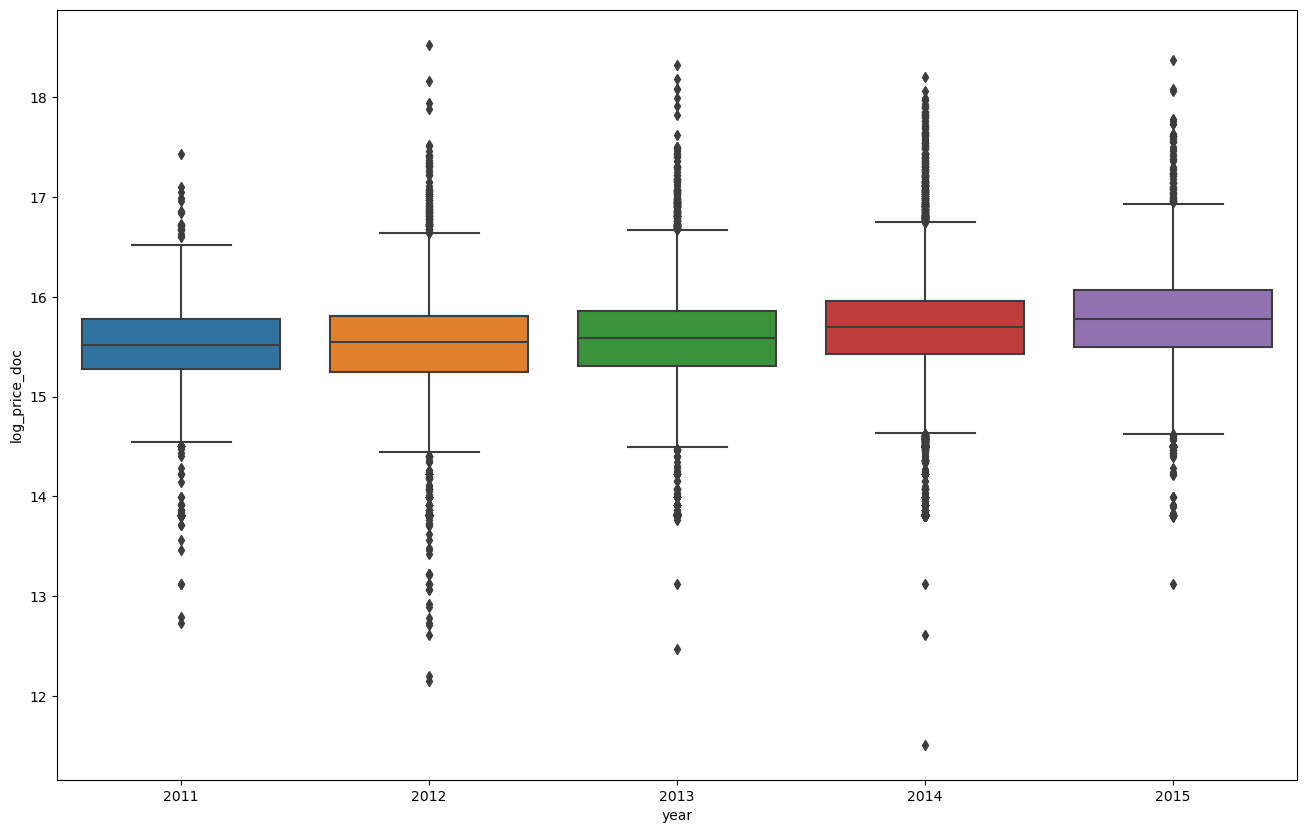

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=data_v2['year'].astype('category'), data=data_v2)
plt.show()

In [79]:
one_hot = pd.get_dummies(data_v2['year'], prefix='year', drop_first=True, dtype='float32')
data_v2 = pd.concat((data_v2.drop('year', axis=1), one_hot), axis=1)

In [80]:
one_hot = pd.get_dummies(data_v2['month'], prefix='month', drop_first=True, dtype='float32')
data_v2 = pd.concat((data_v2.drop('month', axis=1), one_hot), axis=1)

In [81]:
data_v2 = data_v2.drop('timestamp', axis=1)

In [82]:
data_v2.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,43,27.0,4.0,12.558974,1.827121,1983.0,1.909804,6.399301,2.107025,6.407578e+06,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,34,19.0,3.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,9.589337e+06,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,43,29.0,2.0,12.558974,1.827121,1958.0,1.909804,6.399301,2.107025,4.808270e+06,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,89,50.0,9.0,12.558974,1.827121,2000.0,1.909804,6.399301,2.107025,1.258354e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,77,77.0,4.0,12.558974,1.827121,1915.0,1.909804,6.399301,2.107025,8.398461e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Сохраним два варианта данных, прогоним их в базовой модели и сделаем вывод, какой вариант будет лучше для нас.

In [83]:
data_v1.to_csv('data_step3v1.csv', index=False, index_label=False)

In [84]:
data_v2.to_csv('data_step3v2.csv', index=False, index_label=False)